<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/20210205_AutoEncoder_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pycaret tpot

In [12]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from pycaret.datasets import get_data
from tpot import TPOTClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from pycaret.classification import *
from sklearn.metrics import classification_report, accuracy_score,f1_score 
from sklearn.metrics import precision_score, recall_score,confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
print(os.listdir('/content/drive/MyDrive/DataSet/'))

['creditcard.csv']


In [13]:
# train autoencoder for regression with no compression in the bottleneck layer
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
# getting data 
data=pd.read_csv('/content/drive/MyDrive/DataSet/creditcard.csv')
data.head()
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
print('X: Features || y:Class Labels: \n')
print(X.shape,y.shape) 
# Converting to arrays   
X = X.values 
y = y.values 
# Split the data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42) 
print('After Splitting : \n')
X_train.shape,X_test.shape,y_train.shape,y_test.shape

X: Features || y:Class Labels: 

(284807, 30) (284807,)
After Splitting : 



((227845, 30), (56962, 30), (227845,), (56962,))

Epoch 1/400
14241/14241 - 22s - loss: 0.0031 - val_loss: 0.0059
Epoch 2/400
14241/14241 - 21s - loss: 4.3415e-04 - val_loss: 5.3360e-04
Epoch 3/400
14241/14241 - 20s - loss: 3.8520e-04 - val_loss: 0.0021
Epoch 4/400
14241/14241 - 20s - loss: 3.4595e-04 - val_loss: 9.6185e-04
Epoch 5/400
14241/14241 - 20s - loss: 3.2473e-04 - val_loss: 9.7071e-04
Epoch 6/400
14241/14241 - 20s - loss: 3.1126e-04 - val_loss: 0.0012
Epoch 7/400
14241/14241 - 21s - loss: 2.9721e-04 - val_loss: 0.0091
Epoch 8/400
14241/14241 - 20s - loss: 2.8599e-04 - val_loss: 2.8788e-04
Epoch 9/400
14241/14241 - 26s - loss: 2.6607e-04 - val_loss: 0.0014
Epoch 10/400
14241/14241 - 22s - loss: 2.5183e-04 - val_loss: 0.0022
Epoch 11/400
14241/14241 - 20s - loss: 2.4048e-04 - val_loss: 0.0036
Epoch 12/400
14241/14241 - 20s - loss: 2.3137e-04 - val_loss: 0.0033
Epoch 13/400
14241/14241 - 20s - loss: 2.2241e-04 - val_loss: 0.0017
Epoch 14/400
14241/14241 - 20s - loss: 2.1398e-04 - val_loss: 4.0665e-04
Epoch 15/400
14241/14241 - 

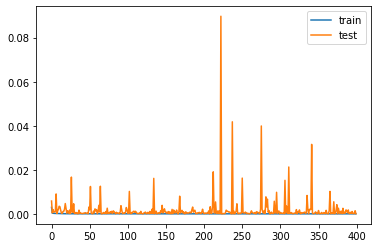

In [ ]:
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

Epoch 1/20
2982/2982 - 10s - loss: 0.0055 - val_loss: 7.1939e-04
Epoch 2/20
2982/2982 - 8s - loss: 9.2914e-04 - val_loss: 0.0012
Epoch 3/20
2982/2982 - 8s - loss: 7.3317e-04 - val_loss: 0.0011
Epoch 4/20
2982/2982 - 8s - loss: 5.9567e-04 - val_loss: 6.5059e-04
Epoch 5/20
2982/2982 - 8s - loss: 4.9372e-04 - val_loss: 0.0012
Epoch 6/20
2982/2982 - 8s - loss: 4.2194e-04 - val_loss: 0.0016
Epoch 7/20
2982/2982 - 8s - loss: 3.8643e-04 - val_loss: 7.8506e-04
Epoch 8/20
2982/2982 - 8s - loss: 3.3962e-04 - val_loss: 0.0019
Epoch 9/20
2982/2982 - 8s - loss: 3.1711e-04 - val_loss: 0.0051
Epoch 10/20
2982/2982 - 11s - loss: 3.0077e-04 - val_loss: 9.1528e-04
Epoch 11/20
2982/2982 - 12s - loss: 2.7881e-04 - val_loss: 4.8828e-04
Epoch 12/20
2982/2982 - 9s - loss: 2.6110e-04 - val_loss: 4.1669e-04
Epoch 13/20
2982/2982 - 8s - loss: 2.5537e-04 - val_loss: 6.5326e-04
Epoch 14/20
2982/2982 - 8s - loss: 2.4045e-04 - val_loss: 4.7540e-04
Epoch 15/20
2982/2982 - 8s - loss: 2.3328e-04 - val_loss: 6.5450e-04

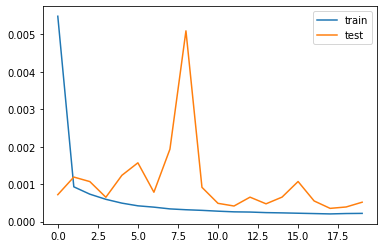

In [29]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
# getting data 

data=pd.read_csv('/content/drive/MyDrive/DataSet/creditcard.csv')
data.head()
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
#Auto-Encoder
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
#encoder level 3
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 1.5)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs*1.5)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# define decoder, level 
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
'''# decoder level 3
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)'''
# output layer
output = Dense(n_inputs,kernel_initializer='uniform',activation=PReLU(),
            name='encoder')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=20, batch_size=64, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [6]:
!pip install lightgbm

In [43]:
# evaluate lightgbm algorithm for classification
import keras
import keras.utils
from keras import utils as np_utils
'''from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = LGBMClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
'''

# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
# define dataset
#getting data 
data=pd.read_csv('/content/drive/MyDrive/DataSet/creditcard.csv')
data.head()
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5', compile='False')


# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model =LGBMClassifier()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
'''
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))'''
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9968048874688389


In [31]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
#getting data 
data=pd.read_csv('/content/drive/MyDrive/DataSet/creditcard.csv')
data.head()
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')

optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

#DEFINE A HELPER FUNCTION TO SHOW EVALUATION METRICS 
def evaluate(y_test,preds):
    print('****EVALUATIONS METRICS****')
    accuracy = round(accuracy_score(y_test, preds),2)
    print("Accuracy == {}".format(accuracy)) 
    #precision
    precision = round(precision_score(y_test, preds),2)
    print("Precision == {}".format(precision)) 
    #recall
    recall = round(recall_score(y_test, preds),2)
    print("Recall == {}".format(recall)) 
    #F1 score
    f1 = round(f1_score(y_test, yhat),2)
    print("F1-Score == {}".format(f1)) 

# Show results on Classifier 
evaluate(y_test,yhat) 

0.9992099996488887
****EVALUATIONS METRICS****
Accuracy == 1.0
Precision == 0.86
Recall == 0.57
F1-Score == 0.69


In [32]:
#DEFINE A HELPER FUNCTION TO SHOW EVALUATION METRICS 
def evaluate(y_test,preds):
    print('****EVALUATIONS METRICS****')
    accuracy = round(accuracy_score(y_test, preds),2)
    print("Accuracy == {}".format(accuracy)) 
    #precision
    precision = round(precision_score(y_test, preds),2)
    print("Precision == {}".format(precision)) 
    #recall
    recall = round(recall_score(y_test, preds),2)
    print("Recall == {}".format(recall)) 
    #F1 score
    f1 = round(f1_score(y_test, yhat),2)
    print("F1-Score == {}".format(f1)) 

# Show results on Classifier 
evaluate(y_test,yhat) 

****EVALUATIONS METRICS****
Accuracy == 1.0
Precision == 0.86
Recall == 0.57
F1-Score == 0.69


In [ ]:
#DEFINE A HELPER FUNCTION TO SHOW EVALUATION METRICS 
def evaluate(y_test,preds):
    print('****EVALUATIONS METRICS****')
    accuracy = round(accuracy_score(y_test, preds),2)
    print("Accuracy == {}".format(accuracy)) 
    #precision
    precision = round(precision_score(y_test, preds),2)
    print("Precision == {}".format(precision)) 
    #recall
    recall = round(recall_score(y_test, preds),2)
    print("Recall == {}".format(recall)) 
    #F1 score
    f1 = round(f1_score(y_test, yhat),2)
    print("F1-Score == {}".format(f1)) 

# Show results on Classifier 
evaluate(y_test,yhat) 

****EVALUATIONS METRICS****
Accuracy == 1.0
Precision == 0.84
Recall == 0.55
F1-Score == 0.67


****EVALUATIONS METRICS****
Accuracy == 1.0
Precision == 0.84
Recall == 0.55


NameError: ignored

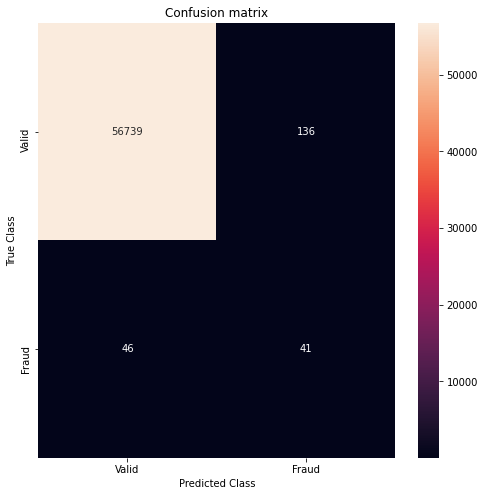

In [45]:
# printing the confusion matrix 
conf_matrix = confusion_matrix(y_test, yhat) 
plt.figure(figsize =(8, 8)) 
sb.heatmap(conf_matrix, xticklabels =['Valid', 'Fraud'], 
           yticklabels = ['Valid', 'Fraud'], annot = True, fmt ="d")
plt.title("Confusion matrix") 
plt.ylabel('True Class') 
plt.xlabel('Predicted Class') 
plt.show() 

In [34]:
#let's shuffle the dataset before getting into undersampling 
data=data.sample(frac=1)
#separate fraud and non fraud transactions 
fraud=data[data.Class==1]
nonfraud=data[data.Class==0][:500]
# create a balanced datafrme of fraud and non fraud transactions and worn on it 
balanced_df = pd.concat([fraud, nonfraud])
# Shuffle dataframe rows
balanced_df= balanced_df.sample(frac=1, random_state=101)
#show 
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151196,94952.0,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,-0.357616,0.637767,-2.818882,2.360595,-1.108699,-1.449951,1.573740,2.202652,0.800471,-2.103583,0.944915,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,571.48,1
15330,26714.0,-0.389827,0.098056,-0.453119,-1.415287,2.964143,2.957651,0.505590,0.472009,-0.845229,-0.099706,0.033663,-0.508051,-0.064659,0.386427,1.376187,-0.317821,-0.319135,-0.031960,1.764743,0.518693,-0.026062,-0.203653,-0.157302,1.108893,0.090742,1.558072,-0.220372,-0.140197,50.00,0
159646,112758.0,2.010086,-0.024383,-1.869322,0.361464,0.220038,-0.972158,0.028050,-0.092713,0.649770,-0.257196,0.770104,-0.383660,-2.003568,-0.151922,0.486009,0.529716,0.195677,1.256811,-0.080637,-0.299276,0.214273,0.651016,-0.050906,-0.512737,0.182020,-0.089763,-0.017988,-0.047874,12.31,0
259052,158936.0,-1.694652,2.156298,-1.806246,0.599043,0.976754,0.979515,0.050236,1.498952,-0.711797,-0.180992,-1.749171,0.304236,0.019518,1.328832,0.448431,-1.469755,1.151797,-1.312303,-0.016421,-0.105292,0.187831,0.733806,-0.199394,-2.001100,0.106170,-0.203580,0.344523,0.129990,10.03,0
47802,43369.0,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,-4.980928,3.657882,-6.409822,-1.087310,-8.509433,1.432572,-5.369890,-9.069079,-2.819807,0.874543,-0.036837,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1


In [35]:
print("Before Undersampling :\n",data.Class.value_counts())
print('________-----________')
print("After Undersampling :\n",balanced_df.Class.value_counts())

Before Undersampling :
 0    284315
1       492
Name: Class, dtype: int64
________-----________
After Undersampling :
 0    500
1    492
Name: Class, dtype: int64


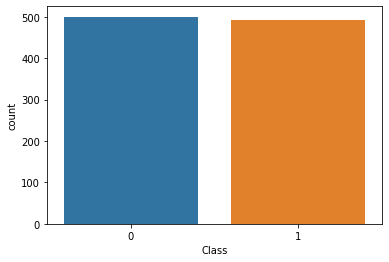

In [36]:
sb.countplot(data=balanced_df,x='Class')

In [37]:
balanced_df.shape

(992, 31)

In [38]:
df=balanced_df.copy()
# dividing the X  and the Y  from the balanced dataset 
X_balanced = df.drop(['Class'], axis = 1) 
y_balanced = df["Class"] 
print('X_balanced: Features || y_balanced:Class Labels: \n')
print(X_balanced.shape,y_balanced.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
X_balanced = X_balanced.values 
y_balanced = y_balanced.values 
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split( X_balanced,y_balanced , test_size = 0.2, random_state = 101) 
print('\n')
print('After Splitting : \n')
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

X_balanced: Features || y_balanced:Class Labels: 

(992, 30) (992,)


After Splitting : 

(793, 30) (199, 30) (793,) (199,)


In [39]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
#getting data 
data=pd.read_csv('/content/drive/MyDrive/DataSet/creditcard.csv')
data.head()
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')


# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

#DEFINE A HELPER FUNCTION TO SHOW EVALUATION METRICS 
def evaluate(y_test,preds):
    print('****EVALUATIONS METRICS****')
    accuracy = round(accuracy_score(y_test, preds),2)
    print("Accuracy == {}".format(accuracy)) 
    #precision
    precision = round(precision_score(y_test, preds),2)
    print("Precision == {}".format(precision)) 
    #recall
    recall = round(recall_score(y_test, preds),2)
    print("Recall == {}".format(recall)) 
    #F1 score
    f1 = round(f1_score(y_test, yhat),2)
    print("F1-Score == {}".format(f1)) 

# Show results on Classifier 
evaluate(y_test,yhat) 

0.9992099996488887
****EVALUATIONS METRICS****
Accuracy == 1.0
Precision == 0.86
Recall == 0.57
F1-Score == 0.69


In [ ]:
# Random Forest Classifier (RANDOM FOREST) 
rfc = RandomForestClassifier()
# Decison Tree Classifier 
dt=DecisionTreeClassifier()
# Logistic Regression Classifier
lr=LogisticRegression()
#put those alorithms into a dictionnary 
models={'Random Forest Classifier': rfc,'Decision Tree':dt,'Logistic Regression':lr}
predictions={}
for name,model in models.items():
    print('***********')
    print(f'TRAINING {name} Model ')
    model.fit(X_train,y_train)
    print('FINISHED TRAINING \n')
    print(f'TRAIN SCORE : {model.score(X_train,y_train)}\n')
    print(f'TEST SCORE : {model.score(X_test,y_test)}\n')
    predictions[name] = model.predict(X_test) 
    print(f'DONE WITH {name} MODEL')

***********
TRAINING Random Forest Classifier Model 
FINISHED TRAINING 

TRAIN SCORE : 1.0

TEST SCORE : 0.964824120603015

DONE WITH Random Forest Classifier MODEL
***********
TRAINING Decision Tree Model 
FINISHED TRAINING 

TRAIN SCORE : 1.0

TEST SCORE : 0.9095477386934674

DONE WITH Decision Tree MODEL
***********
TRAINING Logistic Regression Model 
FINISHED TRAINING 

TRAIN SCORE : 0.9394703656998739

TEST SCORE : 0.9698492462311558

DONE WITH Logistic Regression MODEL


In [25]:
# Setup the dataset and preprocess 
pycaret_clf=setup(data=balanced_df,target='Class',train_size=0.8)

,Description,Value
0,session_id,1148
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(992, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
#let's compare models  
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9369,0.9762,0.8997,0.9701,0.9331,0.8736,0.8765,0.580
catboost,CatBoost Classifier,0.9356,0.9786,0.8945,0.9728,0.9314,0.8710,0.8746,9.275
et,Extra Trees Classifier,0.9319,0.9765,0.8715,0.9887,0.9258,0.8634,0.8700,0.469
lightgbm,Light Gradient Boosting Machine,0.9293,0.9793,0.8997,0.9538,0.9255,0.8584,0.8604,0.297
gbc,Gradient Boosting Classifier,0.9268,0.9772,0.8920,0.9565,0.9226,0.8534,0.8560,0.527
xgboost,Extreme Gradient Boosting,0.9217,0.9789,0.8997,0.9396,0.9184,0.8433,0.8454,1.758
lr,Logistic Regression,0.9205,0.9694,0.8945,0.9413,0.9166,0.8408,0.8429,0.202
ada,Ada Boost Classifier,0.9155,0.9652,0.8998,0.9268,0.9125,0.8308,0.8321,0.198
qda,Quadratic Discriminant Analysis,0.9092,0.9585,0.8817,0.9311,0.9045,0.8181,0.8209,0.025
ridge,Ridge Classifier,0.9091,0.0000,0.8407,0.9709,0.8995,0.8177,0.8267,0.024


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1148, verbose=0,
                       warm_start=False)

In [ ]:
# Create the XGBoost Classifier for prediction 
xgboost=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9375,0.9581,0.9000,0.9730,0.9351,0.8750,0.8775
1,0.9500,0.9981,0.9750,0.9286,0.9512,0.9000,0.9011
2,0.9250,0.9725,0.9500,0.9048,0.9268,0.8500,0.8511
3,0.9367,0.9942,0.9744,0.9048,0.9383,0.8735,0.8760
4,0.9873,1.0000,0.9744,1.0000,0.9870,0.9747,0.9750
5,0.9367,0.9821,0.9250,0.9487,0.9367,0.8734,0.8737
6,0.9494,0.9808,0.9000,1.0000,0.9474,0.8988,0.9035
7,0.9747,0.9859,0.9500,1.0000,0.9744,0.9494,0.9506
8,0.9367,0.9897,0.9000,0.9730,0.9351,0.8735,0.8760
9,0.9494,0.9718,0.9000,1.0000,0.9474,0.8988,0.9035


In [ ]:
tuned_xgboost=tune_model(xgboost,n_iter=200)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9644,0.9250,0.9737,0.9487,0.9000,0.9011
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9125,0.9806,0.9250,0.9024,0.9136,0.8250,0.8253
3,0.9620,0.9968,0.9744,0.9500,0.9620,0.9241,0.9244
4,0.9747,0.9994,0.9487,1.0000,0.9737,0.9493,0.9505
5,0.9367,0.9853,0.9000,0.9730,0.9351,0.8735,0.8760
6,0.9494,0.9859,0.9000,1.0000,0.9474,0.8988,0.9035
7,0.9620,0.9923,0.9250,1.0000,0.9610,0.9241,0.9268
8,0.9494,0.9833,0.9250,0.9737,0.9487,0.8988,0.8999
9,0.9620,0.9660,0.9250,1.0000,0.9610,0.9241,0.9268


In [50]:
data.shape
pycaret_clf=setup(data=data,target='Class',train_size=0.8)

,Description,Value
0,session_id,2512
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:41:06
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
